In [1]:
import astropy.io.fits as fits
import matplotlib.pyplot as plt
import numpy as np
import gc
%matplotlib inline

In [2]:
sdss = fits.open('output2.fits') #SDSS objects following the prescription in Belokurov et al

In [183]:
ra, dec, r = sdss[1].data['ra'],sdss[1].data['dec'],sdss[1].data['r'] #Import RA, Dec, r magnitude
len(ra) #9,744,165 objects 

9744165

In [184]:
sdssR = sdss[1].data[(r > 21.33) & (r <= 22.0)]
sdssG = sdss[1].data[(r > 20.66) & (r <= 21.33)]
sdssB = sdss[1].data[(r > 20.0) & (r <= 20.66)]

In [185]:
binsx = np.ceil(2*(np.max(sdssR['ra']) - np.min(sdssR['ra']))) #RA bins = 720
binsy = np.ceil(2*(np.max(sdssR['dec']) - np.min(sdssR['dec']))) #Dec bins = 360
ranges = [[np.min(ra),np.max(ra)],[np.min(dec),np.max(dec)]]
RH, Rxedges, Ryedges = np.histogram2d(sdssR['ra'],sdssR['dec'],[binsx,binsy],range=ranges)
GH, Gxedges, Gyedges = np.histogram2d(sdssG['ra'],sdssG['dec'],[binsx,binsy],range=ranges)
BH, Bxedges, Byedges = np.histogram2d(sdssB['ra'],sdssB['dec'],[binsx,binsy],range=ranges)

In [186]:
RH[(RH > 100)] = 0. #Filter out over-dense regions
GH[(GH > 100)] = 0.
BH[(BH > 100)] = 0.

In [187]:
totH = np.zeros((binsy,binsx,3),dtype='uint8') #Create (NxMx3) matrix to feed into imshow's RGB function
totH[:,:,0] = RH.T / (RH.max() / 255)
totH[:,:,1] = GH.T / (GH.max() / 255)
totH[:,:,2] = BH.T / (BH.max() / 255)

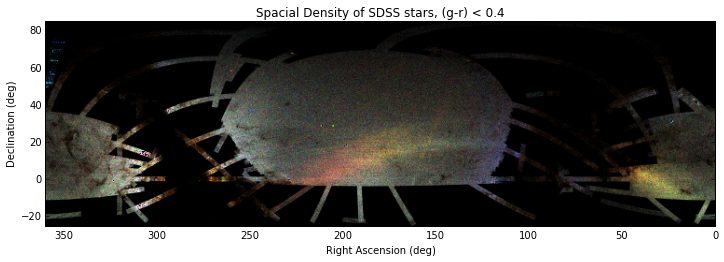

In [188]:
plt.figure(figsize=(12,12))
plt.imshow(totH,extent=[Rxedges[0],Rxedges[-1],Ryedges[-1],Ryedges[0]])
plt.title('Spacial Density of SDSS stars, (g-r) < 0.4')
plt.xlabel('Right Ascension (deg)')
plt.ylabel('Declination (deg)')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()